# Company Profile EDA

In [1]:
import pandas as pd
import nltk

import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from matplotlib import pyplot as plt

from nltk.tokenize import PunktSentenceTokenizer,RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from sklearn.feature_extraction.text import CountVectorizer

!pip install lda
import lda

import re
from collections import Counter
import math

!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 4.7 MB/s 
     |████████████████████████████████| 99 kB 1.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 4.9 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read in Data

In [3]:
fake_jobs = pd.read_csv('fake_job_postings.csv')
fake_jobs.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
fake_jobs['company_profile']

0        We're Food52, and we've created a groundbreaki...
1        90 Seconds, the worlds Cloud Video Production ...
2        Valor Services provides Workforce Solutions th...
3        Our passion for improving quality of life thro...
4        SpotSource Solutions LLC is a Global Human Cap...
                               ...                        
17875    Vend is looking for some awesome new talent to...
17876    WebLinc is the e-commerce platform and service...
17877    We Provide Full Time Permanent Positions for m...
17878                                                  NaN
17879    Vend is looking for some awesome new talent to...
Name: company_profile, Length: 17880, dtype: object

## Frequencies

In [5]:
def removeStopwords(textData):
    stop_words_list = stopwords.words('english') # Choose the stop English stopwords
    stop_words_list.append('–')# Add - to the stopwords
    stop_words = set(stop_words_list)
    word_tokens = [t for t in textData.split()] # Split the comment into words
    # For every word, return the word if it is not a stopword, a doubl-quote, a dash, a comma or a period.
    filtered_sentence = [w for w in word_tokens if (not w == '"') & (not w == '-') & (not w == '.') & (not w == ',') & (not w.lower() in stop_words)]
    return filtered_sentence

def filteredFreq(postList):
    wordFrecSeries = [] # Create empty list
    wordFrecSeries = pd.Series(wordFrecSeries) # Convert the list into a Series
    # For each post in the list of posts (the parameter) get the frequency of each of its words
    for post in postList:
        # For each word in the post, get its frequency
        for word in post:
            # If the word had already been found sum 1, else add the word to the Series
            if word in wordFrecSeries:
                wordFrecSeries[word] = wordFrecSeries[word]+1
            else:
                wordFrecSeries[word] = 1
    return wordFrecSeries.sort_values(ascending=False)[:400] # Order the series and return the top 400 values

company_profile = fake_jobs['company_profile'].astype(str)
word_list = company_profile.map(removeStopwords)
frequency_series = filteredFreq(word_list)

<ipython-input-5-33a2fe5cf2f3>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  wordFrecSeries = pd.Series(wordFrecSeries) # Convert the list into a Series


work            5826
team            5803
people          5253
company         4707
help            4257
business        4029
&amp;           4023
solutions       3555
services        3453
new             3309
nan             3308
us              3228
clients         3091
technology      2875
one             2806
customer        2777
companies       2736
great           2712
working         2660
provide         2514
digital         2391
also            2348
best            2304
quality         2288
want            2270
right           2233
looking         2185
every           2184
service         2097
experience      2075
around          2036
world           2027
drive           2023
global          1974
make            1941
innovative      1931
get             1911
way             1907
leading         1885
like            1882
providing       1868
customers       1845
based           1843
professional    1815
time            1781
employees       1761
across          1751
products     

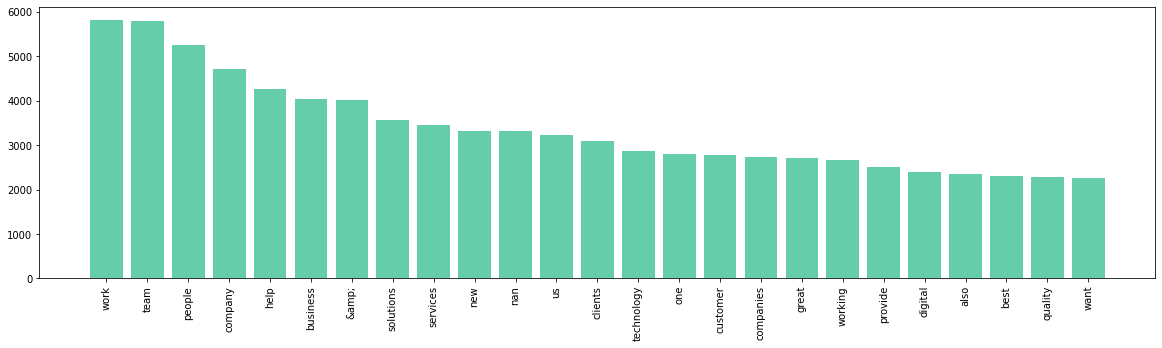

In [6]:
print(frequency_series[:50])
#print(frequency_series[51:100])
#print(frequency_series[101:150])
print('Important Attributes: services, technology, platform, sofwtare, communications, marketing, education, design, startup, HR')
plt.figure(figsize=(20, 5))
plt.bar(frequency_series[:25].index, frequency_series[:25], color='mediumaquamarine')
plt.xticks(rotation='vertical')
plt.show()

# fake_jobs['company_profile'][fake_jobs['company_profile'] == 'nan'] MADE SURE THERE WERE NO FALSE nan

## Lift

In [7]:
def removeStopwords(textData):
    stop_words_list = stopwords.words('english') # Choose the stop English stopwords
    stop_words_list.append('–')# Add - to the stopwords
    stop_words = set(stop_words_list)
    word_tokens = [t for t in textData.split()] # Split the comment into words
    # For every word, return the word if it is not a stopword, a doubl-quote, a dash, a comma or a period.
    filtered_sentence = [w for w in word_tokens if (not w == '"') & (not w == '-') & (not w == '.') & (not w == ',') & (not w.lower() in stop_words)]
    return filtered_sentence

def getLiftAB(termA, termB, postList):
    """
    Function that calculates the lift between two terms
    """
    flagInPostA = 0
    flagInPostB = 0
    flagInPostAB = 0
    freqAB = 0
    freqA = 0
    freqB = 0
    for post in postList: # For each post in the list of posts (the parameter) get the frequency of each of its words
        for word in post: # For each word in the post, get its frequency and then set the flags back to the original value
            if flagInPostAB == 0: # If both terms have not been found inside the post
                if flagInPostA == 0: # If term A has not been previously found in the post check if the current word is term A
                    if word == termA: # If the current word is term A add 1 to the frequency and set the flagA to 1
                        freqA += 1
                        flagInPostA = 1
                if flagInPostB == 0: # If term B has not been previously found in the post check if the current word is term B
                    if word == termB: # If the current word is term B add 1 to the frequency and set the flagB to 1
                        freqB += 1
                        flagInPostB = 1
                if (flagInPostA == 1) & (flagInPostB == 1): # If after this iteration both terms have been found inside the post, add 1 to the frequncy AB and set the flagAB to 1
                    freqAB += 1
                    flagInPostAB = 1
        # After all words have been checked, return the flags to zero and move on to the next post
        flagInPostA = 0
        flagInPostB = 0
        flagInPostAB = 0
    # Make sure that the lifts can be computed (no divisions over zero)
    if freqA == 0:
        freqA = 1
    if freqB == 0:
        freqB = 1
    # Compute lift between term A and B
    liftAB = (len(postList) * freqAB) / (freqA * freqB)
    return liftAB  

def liftTable(importantList, postList):
    """
    Function that gets the lifts between many words (the ones with highest frequncies)
    """
    liftList = []
    liftSeries = pd.Series(liftList) # Create empty series
    liftDataFrame = pd.DataFrame(liftSeries) # Create empty dataframe
    for i in range(len(importantList)): # For each brand
        liftDataFrame.loc[importantList[i], importantList[i]] = 0
        for j in range(i+1,len(importantList)): # For each pair of brands
            liftAB = getLiftAB(importantList[i], importantList[j], postList) # Get the lift of this brand-pair
            liftDataFrame.loc[importantList[i], importantList[j]] = liftAB
            liftDataFrame.loc[importantList[j], importantList[i]] = liftAB
    liftDataFrame = liftDataFrame.drop([0], axis=1)
    return liftDataFrame

company_profile = fake_jobs['company_profile'].dropna().astype(str) # Get data
word_list = company_profile.map(removeStopwords) # For the company profile column, map the function removeStopWords
attribute_list = ['services', 'technology', 'platform', 'sofwtare', 'communications', 'marketing', 'education', 'design', 'startup', 'HR']
lift_table = liftTable(attribute_list, word_list)
print(lift_table)

<ipython-input-7-28acce3fd496>:52: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  liftSeries = pd.Series(liftList) # Create empty series


                services  technology  platform  sofwtare  communications  \
services        0.000000    1.294015  0.630482       0.0        0.543279   
technology      1.294015    0.000000  2.386471       0.0        0.370577   
platform        0.630482    2.386471  0.000000       0.0        0.499270   
sofwtare        0.000000    0.000000  0.000000       0.0        0.000000   
communications  0.543279    0.370577  0.499270       0.0        0.000000   
marketing       0.773311    2.569717  2.693038       0.0        0.495646   
education       0.557342    0.574505  0.639867       0.0        0.000000   
design          2.066486    2.027759  1.398671       0.0        0.514215   
startup         0.218411    1.393035  2.686430       0.0        0.000000   
HR              0.671152    0.421237  0.590088       0.0        0.748710   

                marketing  education    design   startup         HR  
services         0.773311   0.557342  2.066486  0.218411   0.671152  
technology       2.5697

## MDS Plot

<ipython-input-8-72aac21f08da>:71: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  liftSeries = pd.Series(liftList) # Create empty series
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_mds.py:517: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


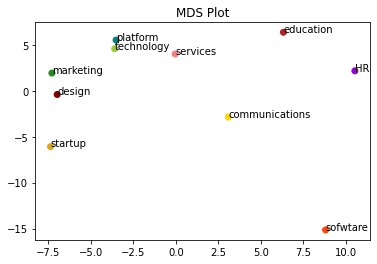

In [8]:
# Source1: https://stackabuse.com/guide-to-multidimensional-scaling-in-python-with-scikit-learn/
# Source2: https://stackoverflow.com/questions/14432557/scatter-plot-with-different-text-at-each-data-point

def removeStopwords(textData):
    stop_words_list = stopwords.words('english') # Choose the stop English stopwords
    stop_words_list.append('–')# Add - to the stopwords
    stop_words = set(stop_words_list)
    word_tokens = [t for t in textData.split()] # Split the comment into words
    # For every word, return the word if it is not a stopword, a doubl-quote, a dash, a comma or a period.
    filtered_sentence = [w for w in word_tokens if (not w == '"') & (not w == '-') & (not w == '.') & (not w == ',') & (not w.lower() in stop_words)]
    return filtered_sentence

def getLiftAB(termA, termB, postList):
    """
    Function that calculates the lift between two terms (brands)
    """
    flagInPostA = 0
    flagInPostB = 0
    flagInPostAB = 0
    freqAB = 0
    freqA = 0
    freqB = 0
    for post in postList: # For each post in the list of posts (the parameter) get the frequency of each of its words
        for word in post: # For each word in the post, get its frequency and then set the flags back to the original value
            if flagInPostAB == 0: # If both terms have not been found inside the post
                if flagInPostA == 0: # If term A has not been previously found in the post check if the current word is term A
                    if word == termA: # If the current word is term A add 1 to the frequency and set the flagA to 1
                        freqA += 1
                        flagInPostA = 1
                if flagInPostB == 0: # If term B has not been previously found in the post check if the current word is term B
                    if word == termB: # If the current word is term B add 1 to the frequency and set the flagB to 1
                        freqB += 1
                        flagInPostB = 1
                if (flagInPostA == 1) & (flagInPostB == 1): # If after this iteration both terms have been found inside the post, add 1 to the frequncy AB and set the flagAB to 1
                    freqAB += 1
                    flagInPostAB = 1
        # After all words have been checked, return the flags to zero and move on to the next post
        flagInPostA = 0
        flagInPostB = 0
        flagInPostAB = 0
    # Make sure that the lifts can be computed (no divisions over zero)
    if freqA == 0:
        freqA = 1
    if freqB == 0:
        freqB = 1
    # Compute lift between term A and B
    liftAB = (len(postList) * freqAB) / (freqA * freqB)
    return liftAB  

def liftTable(importantList, postList):
    """
    Function that gets the lifts between many words (the ones with highest frequncies)
    """
    liftList = []
    liftSeries = pd.Series(liftList) # Create empty series
    liftDataFrame = pd.DataFrame(liftSeries) # Create empty dataframe
    for i in range(len(importantList)): # For each brand
        liftDataFrame.loc[importantList[i], importantList[i]] = 0
        for j in range(i+1,len(importantList)): # For each pair of brands
            liftAB = getLiftAB(importantList[i], importantList[j], postList) # Get the lift of this brand-pair
            liftDataFrame.loc[importantList[i], importantList[j]] = liftAB
            liftDataFrame.loc[importantList[j], importantList[i]] = liftAB
    liftDataFrame = liftDataFrame.drop([0], axis=1)
    return liftDataFrame

def inverseLift(importantList, postList):
    """
    Function that gets the lifts between many brands (the ones with highest frequncies)
    """
    liftList = []
    liftSeries = pd.Series(liftList) # Create empty series
    liftDataFrame = pd.DataFrame(liftSeries) # Create empty dataframe
    for i in range(len(importantList)): # For each brand
        liftDataFrame.loc[importantList[i], importantList[i]] = 0
        for j in range(i+1,len(importantList)): # For each pair of brands
            liftAB = getLiftAB(importantList[i], importantList[j], postList) # Get the lift of this brand-pair
            if liftAB == 0:
                inverseLift = 8
            else:
                inverseLift = 1/liftAB
            liftDataFrame.loc[importantList[i], importantList[j]] = inverseLift
            liftDataFrame.loc[importantList[j], importantList[i]] = inverseLift
    liftDataFrame = liftDataFrame.drop([0], axis=1)
    return liftDataFrame

word_list = fake_jobs['company_profile'].dropna().astype(str).map(removeStopwords) # Get data
attribute_list = ['services', 'technology', 'platform', 'sofwtare', 'communications', 'marketing', 'education', 'design', 'startup', 'HR']
attribute_lifts = inverseLift(attribute_list, word_list)
mdsAttributes = MDS(random_state=0)
liftTransform = mdsAttributes.fit_transform(attribute_lifts) # Transform distances into 2D
colors = ['lightcoral', 'yellowgreen', 'teal', 'orangered', 'gold', 'forestgreen', 'firebrick', 'maroon', 'goldenrod', 'darkviolet']
plt.scatter(liftTransform[:,0], liftTransform[:,1], c=colors)#, s=size, c=colors)
plt.title('MDS Plot')
for i, txt in enumerate(attribute_list):
    plt.annotate(txt, (liftTransform[:,0][i], liftTransform[:,1][i]))
plt.show()

## Creat Company ID Column

In [9]:
company_id = []
for i in range(len(fake_jobs['company_profile'].value_counts())):
    company_id.append('company_{}'.format(i))
company_id_series = pd.Series(company_id, fake_jobs['company_profile'].value_counts().index)

def getCompanyID(company_profile):
    return company_id_series[company_profile]

company_profile_LDA = fake_jobs.copy()
company_profile_LDA = company_profile_LDA[company_profile_LDA['company_profile'].notnull()]
company_profile_LDA['company_id'] = company_profile_LDA['company_profile'].map(getCompanyID)
company_profile_LDA[:2]

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,company_id
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,company_44
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,company_96


## Topic Modeling with LDA

In [10]:
# Source: Prof. Barua

fakeJob_id = input('provide the column name for id: ') # job_id
company_id = input('provide the column name for company id: ') # company_id
company_profile = input('provide the column name for text: ') # company_profile
ntopics= input('Provide the number of latent topics: ');


word_tokenizer=RegexpTokenizer(r'\w+')
wordnet_lemmatizer = WordNetLemmatizer()
stopwords_nltk = stopwords.words('english') # Choose the stop English stopwords
extraStopWords = ['–']
for word in extraStopWords: # Add – to the stopwords
    stopwords_nltk.append(word)
stopwords_nltk = set(stopwords_nltk)

provide the column name for id: job_id
provide the column name for company id: company_id
provide the column name for text: company_profile
Provide the number of latent topics: 5


In [11]:
def tokenize_text(version_desc):
    lowercase=version_desc.lower()
    text = wordnet_lemmatizer.lemmatize(lowercase)
    tokens = word_tokenizer.tokenize(text)
    return tokens

vec_words = CountVectorizer(tokenizer=tokenize_text,stop_words=stopwords_nltk,decode_error='ignore')
total_features_words = vec_words.fit_transform(company_profile_LDA[company_profile])

print(total_features_words.shape)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'ha', 'wa'] not in stop_words.
  warnings.warn(


(14572, 15571)


In [12]:
model = lda.LDA(n_topics=int(ntopics), n_iter=300, random_state=1) # CHANGE n_iter BACK TO 500
model.fit(total_features_words)

In [13]:
topic_word = model.topic_word_
doc_topic=model.doc_topic_
doc_topic=pd.DataFrame(doc_topic)
company_profile_LDA=company_profile_LDA.join(doc_topic)
jobs=pd.DataFrame()

for i in range(int(ntopics)):
    topic="topic_"+str(i)
    jobs[topic]=company_profile_LDA.groupby([company_id])[i].mean()

jobs=jobs.reset_index()
topics=pd.DataFrame(topic_word)
topics.columns=vec_words.get_feature_names()
topics1=topics.transpose()
print ("Topics word distribution written in file AMLproject_topic_word_dist.xlsx ")
topics1.to_excel("AMLproject_topic_word_dist.xlsx")
jobs.to_excel("AMLproject_document_topic_dist.xlsx",index=False)
print ("Document topic distribution written in file AMLproject_document_topic_dist.xlsx ")

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topics word distribution written in file AMLproject_topic_word_dist.xlsx 
Document topic distribution written in file AMLproject_document_topic_dist.xlsx 


## LDA Analysis

In [14]:
companyTopics = pd.read_excel("AMLproject_document_topic_dist.xlsx")

wordTopics = pd.read_excel("AMLproject_topic_word_dist.xlsx")

wordTopics.rename(columns={'Unnamed: 0': 'word'}, inplace=True)
wordTopics.head()

,word,0,1,2,3,4
0,0,8.007129e-08,3.235841e-08,1.462580e-04,9.521116e-08,1.480017e-04
1,00,8.007129e-08,3.235841e-08,7.347627e-06,9.521116e-08,4.351710e-08
2,000,3.684080e-04,1.122869e-03,6.945884e-04,9.521116e-08,1.074916e-03
3,01,8.007129e-08,9.739880e-06,3.655536e-08,9.521116e-08,4.351710e-08
4,02,8.007129e-08,1.621156e-05,3.655536e-08,9.521116e-08,4.351710e-08


In [15]:
wordTopics.sort_values(by=0, ascending=False)[:20] # general
wordTopics.sort_values(by=2, ascending=False)[:20] #

,word,0,1,2,3,4
12697,team,4.436029e-03,4.549624e-03,0.013577,7.797889e-03,3.772976e-03
9473,people,6.566646e-04,4.536681e-03,0.011340,6.750566e-03,5.226448e-03
14512,work,5.949377e-03,5.190321e-03,0.010140,8.112086e-03,5.126358e-03
13927,us,1.421273e-02,2.271592e-03,0.007541,6.665733e-04,3.037537e-03
14525,working,8.007129e-08,8.931244e-04,0.006913,5.798455e-03,1.610176e-03
2813,company,6.285676e-03,7.960200e-03,0.006821,1.647248e-03,7.132497e-03
14274,want,6.806860e-04,1.892999e-03,0.006554,9.521116e-08,3.351252e-04
5866,great,8.007129e-08,1.401151e-03,0.006372,5.731807e-03,7.354826e-04
7747,looking,8.007129e-08,1.407623e-03,0.006372,4.380665e-04,4.351710e-08
8740,new,3.419124e-03,3.057902e-03,0.006240,6.189677e-04,6.449278e-03


## Company ID Column

In [16]:
company_id = []
for i in range(len(fake_jobs['company_profile'].value_counts())):
    company_id.append('company_{}'.format(i))
company_id_series = pd.Series(company_id, fake_jobs['company_profile'].value_counts().index)

def getCompanyID(company_profile):
    return company_id_series[company_profile]

company_profile_Cosine = fake_jobs.copy()[['job_id', 'company_profile', 'location']]
company_profile_Cosine = company_profile_Cosine[company_profile_Cosine['company_profile'].notnull()]
company_profile_Cosine['company_id'] = company_profile_Cosine['company_profile'].map(getCompanyID)
company_profile_Cosine[:2]

,job_id,company_profile,location,company_id
0,1,"We're Food52, and we've created a groundbreaki...","US, NY, New York",company_44
1,2,"90 Seconds, the worlds Cloud Video Production ...","NZ, , Auckland",company_96


## Cosine Similarity

In [17]:
# Source: https://stackoverflow.com/questions/15173225/calculate-cosine-similarity-given-2-sentence-strings
WORD = re.compile(r"[^,-]\w+")

def text_to_vector(text):
    """
    Convert text to vector.
    """
    if type(text) == list:
        text1 = []
        for word in text:
            text1.append(word.replace("'", ""))
        text1 = ' '.join(text1).lower()
        words = WORD.findall(text1)
    else:
        words = WORD.findall(text)
    return Counter(words)

def get_cosine(vec1, vec2):
    """
    Get the cosine similarity between attributes and reviews.
    """
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])
    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

# Get attributes from user
attributes = str(input('What attributes are you looking for? (separate you attributes by commas): ')).lower()
attributeList = attributes.split(', ')
attributeDF = pd.DataFrame(attributeList)
attributeDF.rename(columns={0: "Attributes"}, inplace=True)
attributeDF.to_csv('CompanyAttributes.csv', header=True, index=False)
attributeDF

company_profile_Cosine # data
to_compareFile = pd.read_csv('CompanyAttributes.csv') # Open attributes CSV
to_compareText = ' '.join(list(to_compareFile['Attributes']))
to_compareVector = text_to_vector(to_compareText)
noStopWords = company_profile_Cosine['company_profile'].map(removeStopwords) # For the company profile map the function removeStopWords
company_profileVector = noStopWords.map(text_to_vector)
cosines = pd.Series([get_cosine(to_compareVector, company_profile) for company_profile in company_profileVector])
company_profile_DF = pd.DataFrame(company_profile_Cosine['company_id'])
company_profile_DF['company_profile'] = company_profile_Cosine['company_profile']
company_profile_DF['company_profile'] = company_profile_DF['company_profile'].apply(lambda x: x.replace('\n', ' '))
company_profile_DF['Similarity'] = cosines
company_profile_DF.sort_values(by='Similarity', ascending=False, inplace=True)        
company_profile_DF
# For example. Attributes: opportunity, team, special

What attributes are you looking for? (separate you attributes by commas): opportunity, team, special


,company_id,company_profile,Similarity
7587,company_7,Tidewater Finance Co. was established in 1992 ...,0.242091
1638,company_15,"Why CSD?CSD is not only a great place to work,...",0.218218
9217,company_3,Established on the principles that full time e...,0.218218
11515,company_54,Aptitude Staffing Solutions has redesigned the...,0.218218
6084,company_32,If working in a cubical seems like your idea o...,0.214423
...,...,...,...
17872,company_145,Flite delivers ad innovation at scale to the w...,NaN
17875,company_13,Vend is looking for some awesome new talent to...,NaN
17876,company_146,WebLinc is the e-commerce platform and service...,NaN
17877,company_1,We Provide Full Time Permanent Positions for m...,NaN


## Sentiment Analysis with VADER

In [18]:
# Source: https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/
def get_sentiment(sentence):
    """
    Get the sentiments of a sentence.
    """
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)

    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        reviewSentiment = 'Positive: {}%'.format(sentiment_dict['pos']*100)
    elif sentiment_dict['compound'] <= - 0.05 :
        reviewSentiment = 'Negative: {}%'.format(sentiment_dict['neg']*100)
    else :
        reviewSentiment = 'Neutral: {}%'.format(sentiment_dict['neu']*100)
    
    return reviewSentiment

company_profile_DF['Sentiment'] = company_profile_DF['company_profile'].map(get_sentiment) # For the company_profile map the function get_sentiment
company_profile_DF.sort_values(by='Similarity')[:4]

,company_id,company_profile,Similarity,Sentiment
12834,company_66,Founded by serial entrepreneur Clive Jackson a...,0.0,Positive: 17.7%
5080,company_544,BuzzDial lets you instantly share reactions to...,0.0,Positive: 22.900000000000002%
5084,company_0,We help teachers get safe &amp; secure jobs ab...,0.0,Positive: 64.7%
5066,company_364,Bandsintown is a digital media company powered...,0.0,Positive: 10.2%


## Realizing Companies Are Either Fake or Not Fake

In [19]:
company_id = []
for i in range(len(fake_jobs['company_profile'].value_counts())):
    company_id.append('company_{}'.format(i))
company_id_series = pd.Series(company_id, fake_jobs['company_profile'].value_counts().index)

def getCompanyID(company_profile):
    return company_id_series[company_profile]

FakeJobs = fake_jobs.copy()
FakeJobs = FakeJobs[FakeJobs['company_profile'].notnull()]
FakeJobs['company_id'] = FakeJobs['company_profile'].map(getCompanyID)

print(FakeJobs['company_id'].value_counts())

fraudulents = FakeJobs[FakeJobs['fraudulent'] == 1]
NOTfraudulents = FakeJobs[FakeJobs['fraudulent'] == 0]

company_0       726
company_1       674
company_2       574
company_3       450
company_4       185
               ... 
company_1704      1
company_1705      1
company_1706      1
company_1707      1
company_1708      1
Name: company_id, Length: 1709, dtype: int64


In [20]:
for company in fraudulents['company_id'].value_counts().index:
    if company in NOTfraudulents['company_id'].value_counts().index:
        print('In Not Fake')